# **Hill and Valley Prediciton with Logistic Regression**

-------------

## **Objective**

This project's objective is to create a logistic regression predictive model that can correctly categorise certain geographic locations as either hills or valleys based on a set of input features. The model's performance will be assessed using a different test dataset after it has been trained on a labelled dataset of geographical features and their corresponding classifications. This project's ultimate objective is to develop a helpful tool for locating hills and valleys in diverse geographic regions, which can be beneficial in areas like geology, agriculture, and urban planning.

## **Data Source**

Github Repository Link of YBI Foundation

## **Import Library**

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

## **Import Data**

In [13]:
data=pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/Hill%20Valley%20Dataset.csv')

## **Describe Data**

In [14]:
data.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V92,V93,V94,V95,V96,V97,V98,V99,V100,Class
0,39.02,36.49,38.20,38.85,39.38,39.74,37.02,39.53,38.81,38.79,...,36.62,36.92,38.80,38.52,38.07,36.73,39.46,37.50,39.10,0
1,1.83,1.71,1.77,1.77,1.68,1.78,1.80,1.70,1.75,1.78,...,1.80,1.79,1.77,1.74,1.74,1.80,1.78,1.75,1.69,1
2,68177.69,66138.42,72981.88,74304.33,67549.66,69367.34,69169.41,73268.61,74465.84,72503.37,...,73438.88,71053.35,71112.62,74916.48,72571.58,66348.97,71063.72,67404.27,74920.24,1
3,44889.06,39191.86,40728.46,38576.36,45876.06,47034.00,46611.43,37668.32,40980.89,38466.15,...,42625.67,40684.20,46960.73,44546.80,45410.53,47139.44,43095.68,40888.34,39615.19,0
4,5.70,5.40,5.28,5.38,5.27,5.61,6.00,5.38,5.34,5.87,...,5.17,5.67,5.60,5.94,5.73,5.22,5.30,5.73,5.91,0


In [15]:
data.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V92,V93,V94,V95,V96,V97,V98,V99,V100,Class
1207,13.00,12.87,13.27,13.04,13.19,12.53,14.31,13.33,13.63,14.55,...,12.48,12.15,13.15,12.35,13.58,13.86,12.88,13.87,13.51,1
1208,48.66,50.11,48.55,50.43,50.09,49.67,48.95,48.65,48.63,48.61,...,46.93,49.61,47.16,48.17,47.94,49.81,49.89,47.43,47.77,0
1209,10160.65,9048.63,8994.94,9514.39,9814.74,10195.24,10031.47,10202.28,9152.99,9591.75,...,9068.11,9191.80,9275.04,9848.18,9074.17,9601.74,10366.24,8997.60,9305.77,1
1210,34.81,35.07,34.98,32.37,34.16,34.03,33.31,32.48,35.63,32.48,...,32.76,35.03,32.89,31.91,33.85,35.28,32.49,32.83,34.82,1
1211,8489.43,7672.98,9132.14,7985.73,8226.85,8554.28,8838.87,8967.24,8635.14,8544.37,...,8609.73,9209.48,8496.33,8724.01,8219.99,8550.86,8679.43,8389.31,8712.80,0


In [16]:
data.dtypes

V1       float64
V2       float64
V3       float64
V4       float64
V5       float64
          ...   
V97      float64
V98      float64
V99      float64
V100     float64
Class      int64
Length: 101, dtype: object

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1212 entries, 0 to 1211
Columns: 101 entries, V1 to Class
dtypes: float64(100), int64(1)
memory usage: 956.5 KB


In [18]:
data.describe

<bound method NDFrame.describe of             V1        V2        V3        V4        V5        V6        V7  \
0        39.02     36.49     38.20     38.85     39.38     39.74     37.02   
1         1.83      1.71      1.77      1.77      1.68      1.78      1.80   
2     68177.69  66138.42  72981.88  74304.33  67549.66  69367.34  69169.41   
3     44889.06  39191.86  40728.46  38576.36  45876.06  47034.00  46611.43   
4         5.70      5.40      5.28      5.38      5.27      5.61      6.00   
...        ...       ...       ...       ...       ...       ...       ...   
1207     13.00     12.87     13.27     13.04     13.19     12.53     14.31   
1208     48.66     50.11     48.55     50.43     50.09     49.67     48.95   
1209  10160.65   9048.63   8994.94   9514.39   9814.74  10195.24  10031.47   
1210     34.81     35.07     34.98     32.37     34.16     34.03     33.31   
1211   8489.43   7672.98   9132.14   7985.73   8226.85   8554.28   8838.87   

            V8        V9     

In [19]:
data.shape

(1212, 101)

## **Data Preprocessing**

In [20]:
data['Class'].value_counts()

0    606
1    606
Name: Class, dtype: int64

In [21]:
data.groupby('Class').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100
Class,,,,,,,,,,,,,,,,,,,,,
0,7913.333251,7825.339967,7902.497294,7857.032079,7775.610198,7875.436337,7804.166584,7722.324802,7793.328416,7686.782046,...,7753.427244,7737.843366,7799.332079,7825.211700,7791.354010,7927.237112,7874.502343,7844.227459,7875.338713,7855.181172
1,8424.850512,8463.272558,8482.810182,8496.705396,8480.984224,8470.623680,8572.998911,8644.958284,8516.011716,8554.753102,...,8478.513399,8502.270264,8452.502739,8492.375924,8490.416832,8499.724109,8496.685660,8436.163251,8510.583069,8457.213581


## **Define Target Variable (y) and Feature Variables (X)**

In [23]:
y=data['Class']

In [24]:
X=data.drop(['Class'],axis=1)

In [25]:
X.shape

(1212, 100)

## **Data Visualization**

Text(0.5, 1.0, 'Valley')

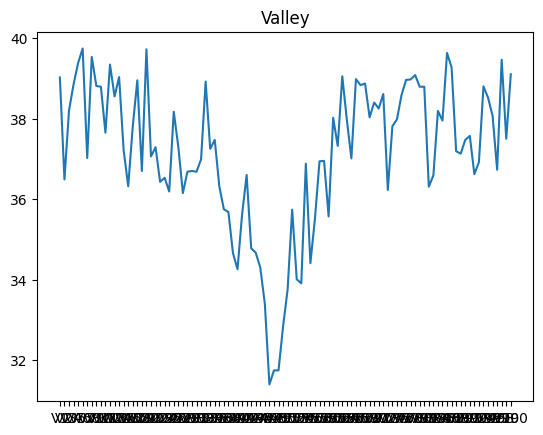

In [26]:
plt.plot(X.iloc[0,:])
plt.title('Valley')

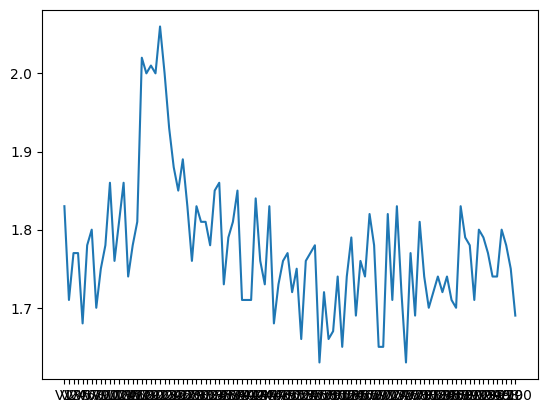

In [27]:
plt.plot(X.iloc[1,:])
plt.title=('Hill')

**Standardize X variables**

In [29]:
ss=StandardScaler()

In [30]:
X = ss.fit_transform(X)

## **Train Test Split**

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, stratify = y, random_state=2529)

In [33]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((848, 100), (364, 100), (848,), (364,))

In [43]:
X_train

array([[-0.4545945 , -0.45559617, -0.4530602 , ..., -0.4582509 ,
        -0.45365854, -0.45758099],
       [ 0.56962844,  0.59568756,  0.50086328, ...,  0.57034067,
         0.59616514,  0.66540473],
       [-0.37607788, -0.38450053, -0.38095424, ..., -0.38906851,
        -0.38567728, -0.38330238],
       ...,
       [ 0.08597052,  0.09635646,  0.09202116, ...,  0.09106595,
         0.09459202,  0.11071079],
       [-0.18088525, -0.18706097, -0.18087654, ..., -0.19184228,
        -0.18328797, -0.20006938],
       [ 0.60636303,  0.61529013,  0.61262196, ...,  0.60524519,
         0.57632278,  0.61447878]])

## **Modeling**

In [35]:
lr=LogisticRegression()

In [36]:
lr.fit(X_train,y_train)

LogisticRegression()

In [44]:
lr.coef_

array([[-1.84270499, -1.39045585, -1.49234285, -1.52256974, -1.3339338 ,
        -1.2454329 , -0.73605004, -0.34938194, -0.47973282,  0.30317318,
         0.15421165,  0.51948459,  0.60817518,  0.26118291,  1.17965597,
         0.47754397,  0.31669713,  0.57321655,  0.27672046,  0.24501548,
         0.12579684, -0.03226036,  0.24844956,  0.04302405,  0.42591888,
         0.37220157,  0.6080162 ,  0.08839837,  0.3488161 , -0.17447771,
         0.19255319,  0.04123939,  0.27675143,  0.08870131,  0.07280511,
         0.43295779,  0.53911607,  0.1894959 ,  0.37207739,  0.04338103,
         0.5808314 ,  0.6186153 ,  0.45407996,  0.18674681,  0.28920305,
         0.4766146 ,  0.2669691 , -0.03101571,  0.09490609,  0.86776814,
         0.28398866,  0.20123426,  0.55979783,  0.52455867,  0.36309339,
         0.41216918, -0.16904251,  0.25589348, -0.01419785,  0.29306429,
        -0.27093212,  0.27356651,  0.41926697,  0.01482811,  0.03766599,
         0.38285702,  0.1533329 , -0.13523077,  0.0

In [37]:
y_predict=lr.predict(X_test)

In [38]:
y_predict.shape

(364,)

## **Model Evaluation**

In [40]:
print(confusion_matrix(y_test,y_predict))

[[181   1]
 [106  76]]


In [41]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.63      0.99      0.77       182
           1       0.99      0.42      0.59       182

    accuracy                           0.71       364
   macro avg       0.81      0.71      0.68       364
weighted avg       0.81      0.71      0.68       364



## **Prediction**

In [46]:
y_test

1062    0
246     1
1021    0
1063    1
474     1
       ..
316     0
219     1
861     1
600     1
892     1
Name: Class, Length: 364, dtype: int64

In [45]:
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,

In [50]:
accuracy_score(y_test,y_predict)

0.7060439560439561